In [40]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
#open "clothes_price_prediction_data" csv file
df = pd.read_csv(r"C:\Users\Lara\Documents\Ironhack\Course\Projects\Project 3\diabetes_prediction_dataset.csv")

In [3]:
#verifying the number of rows and columns
df.shape

(100000, 9)

In [4]:
#verifying the dtypes of the dataframe df - we can also use df.info()
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [5]:
#verifying if there are null values in dataframe df - we can also use df.info()
df.isnull().sum()  #there are no null values in df

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
#check the unique values for each column
for col in df.columns:
    unique_values=df[col].unique()
    print(f"column {col}:{unique_values}")

column gender:['Female' 'Male' 'Other']
column age:[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
column hypertension:[0 1]
column heart_disease:[1 0]
column smoking_history:['never' 'No Info' 'current' 'former' 'ever' 'not current']
column bmi:[25.19 27.32 23.45 ... 59.42 44.39 60.52]
column HbA1c_level:[6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
column blood_glucose_level:[140  80 158 155  85 200 145

In [7]:
#rename the column 'HbA1c_level' to 'glycated hemoglobin_level' - assigned to df_renamed
df_renamed = df.rename(columns= {'HbA1c_level': 'glycated_hemoglobin_level'})

In [8]:
#check if there are duplicates in df_renamed - we can also use df.info()
df_renamed.duplicated().sum() #there are no duplicates in df

3854

In [9]:
#drop duplicates from df_renamed
df_renamed.drop_duplicates(inplace=True)

In [10]:
#verifying the statistics of df_renamed
df_renamed.describe()

,age,hypertension,heart_disease,bmi,glycated_hemoglobin_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [11]:
#df_renamed head
df_renamed.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,glycated_hemoglobin_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [12]:
#Create dummy variables - "gender" and "smoking-history" - assign to df_encoded
df_encoded = pd.get_dummies(df_renamed, columns=["gender", "smoking_history"])

In [13]:
#df_encoded head
df_encoded.head()

,age,hypertension,heart_disease,bmi,glycated_hemoglobin_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,True,False,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,False,True,False,False,False,False


In [14]:
#rename columns of df_encoded - assign to a new dataframe - df-final
df_final = df_encoded.rename(columns= {"gender_Female": "gender_female",
                                       "gender_Male":"gender_male",
                                       "gender_Other":"gender_other",
                                       "smoking_history_No Info":"smoking_history_no_info"})

In [15]:
#Perform Train Test Split
#define features and target - target = "diabetes"
features = df_final.drop(columns = ["diabetes"])
target = df_final["diabetes"]

In [16]:
#Division of data - 80% for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [17]:
#X_train head
X_train.head()

,age,hypertension,heart_disease,bmi,glycated_hemoglobin_level,blood_glucose_level,gender_female,gender_male,gender_other,smoking_history_no_info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
72101,42.0,0,0,30.13,6.0,80,False,True,False,True,False,False,False,False,False
9504,62.0,0,1,40.90,9.0,220,False,True,False,False,False,False,True,False,False
39541,62.0,0,0,41.52,5.7,155,True,False,False,False,True,False,False,False,False
67858,4.0,0,0,27.32,3.5,160,False,True,False,True,False,False,False,False,False
11335,65.0,0,0,28.25,5.0,100,False,True,False,False,False,False,False,True,False


In [18]:
#X_test head
X_test.head()

,age,hypertension,heart_disease,bmi,glycated_hemoglobin_level,blood_glucose_level,gender_female,gender_male,gender_other,smoking_history_no_info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
77645,62.0,0,0,28.01,3.5,200,False,True,False,False,False,False,True,False,False
68911,59.0,0,0,34.92,6.8,280,False,True,False,False,False,False,False,False,True
4123,73.0,0,0,22.10,4.0,100,True,False,False,False,False,False,False,False,True
50172,63.0,0,0,26.19,7.0,140,False,True,False,False,False,False,False,True,False
71861,34.0,0,0,34.05,5.7,80,False,True,False,False,False,False,True,False,False


In [19]:
#Normalization
normalizer = MinMaxScaler()

In [20]:
#Fit the trainind data
normalizer.fit(X_train)

MinMaxScaler()

In [21]:
#Tranform training ans test data
##Tranform X_train
X_train_norm = normalizer.transform(X_train) 

##Transform X_test
X_test_norm = normalizer.transform(X_test) 

In [22]:
#Tranforming X_train_norm and X_test_norm as DataFrame (for esasier manipulation - in the previous step it will just return arrays)
##Tranform X_train_norm
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)


##Tranform X_test_norm
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [23]:
#Create KNN Regression Model
##n_neighbors = 10
knn = KNeighborsRegressor(n_neighbors=10)

In [24]:
#Training KNN for normalize data
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=10)

In [25]:
#Evaluate KNN performance
knn.score(X_test_norm, y_test)  

0.6120443788460861

In [26]:
#Make predictions on the test set
from sklearn.metrics import mean_squared_error
pred = knn.predict(X_test_norm)
np.sqrt(mean_squared_error(y_test, pred))

0.17530598759760463

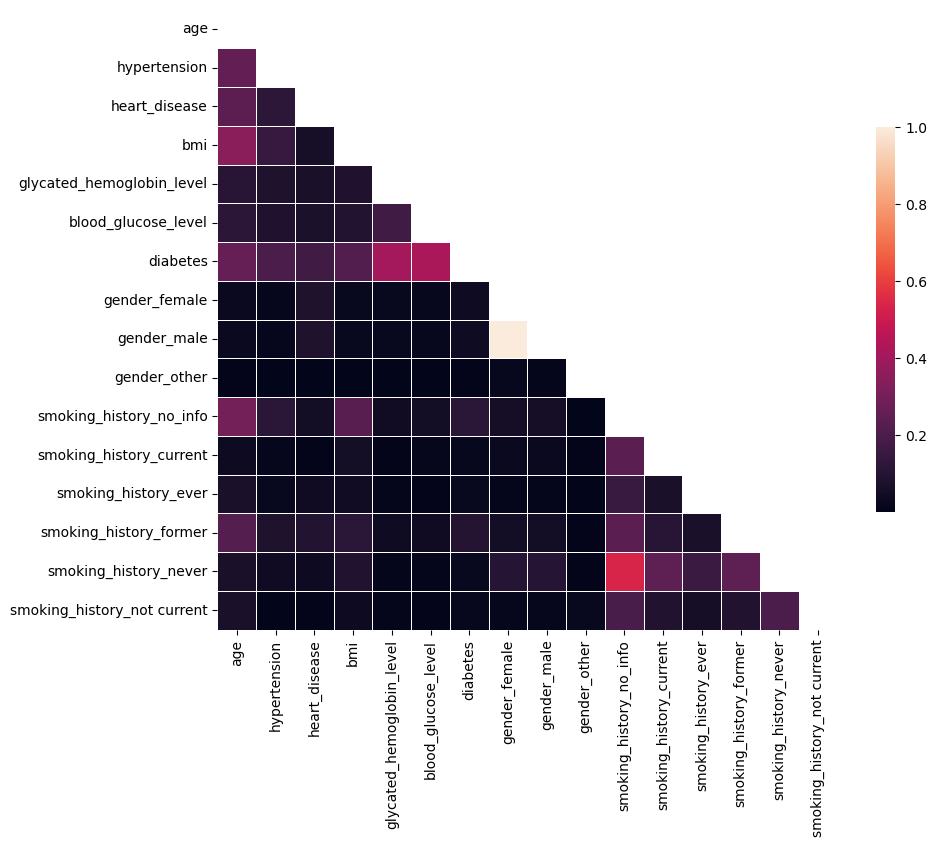

In [27]:
#Create visualization chart to see the correlation between features
corr=np.abs(df_final.corr())  

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()
#Note: we cannot see numbers because there are a big number of features

In [28]:
#Check the correlation between the features (because in the previous step we coudn't see the numbers)
df_final.corr()

,age,hypertension,heart_disease,bmi,glycated_hemoglobin_level,blood_glucose_level,diabetes,gender_female,gender_male,gender_other,smoking_history_no_info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
age,1.000000,0.257305,0.238451,0.344797,0.106719,0.114317,0.264927,0.028785,-0.028580,-0.007456,-0.294166,0.033424,0.068179,0.221802,0.069213,0.069871
hypertension,0.257305,1.000000,0.119982,0.148111,0.081441,0.084834,0.195710,-0.014129,0.014240,-0.003969,-0.111535,0.015637,0.021178,0.080940,0.042553,-0.000951
heart_disease,0.238451,0.119982,1.000000,0.061376,0.068140,0.070832,0.170711,-0.078456,0.078539,-0.002822,-0.048194,0.006031,0.039469,0.093663,-0.033729,0.006810
bmi,0.344797,0.148111,0.061376,1.000000,0.084423,0.092543,0.214932,0.023484,-0.023488,0.000117,-0.229352,0.053933,0.044396,0.111806,0.088197,0.035208
glycated_hemoglobin_level,0.106719,0.081441,0.068140,0.084423,1.000000,0.171615,0.406408,-0.019897,0.019944,-0.001620,-0.044146,0.005598,0.008715,0.036941,0.008967,0.009407
blood_glucose_level,0.114317,0.084834,0.070832,0.092543,0.171615,1.000000,0.424336,-0.017834,0.017824,0.000410,-0.049909,0.011962,0.005648,0.040361,0.010732,0.007870
diabetes,0.264927,0.195710,0.170711,0.214932,0.406408,0.424336,1.000000,-0.037763,0.037883,-0.004256,-0.112576,0.017037,0.021915,0.095492,0.023136,0.018921
gender_female,0.028785,-0.014129,-0.078456,0.023484,-0.019897,-0.017834,-0.037763,1.000000,-0.999615,-0.016217,-0.055204,-0.025913,-0.010499,-0.049174,0.098894,0.012211
gender_male,-0.028580,0.014240,0.078539,-0.023488,0.019944,0.017824,0.037883,-0.999615,1.000000,-0.011542,0.055215,0.026039,0.010473,0.049301,-0.098749,-0.012790
gender_other,-0.007456,-0.003969,-0.002822,0.000117,-0.001620,0.000410,-0.004256,-0.016217,-0.011542,1.000000,-0.000252,-0.004450,0.000958,-0.004478,-0.005455,0.020813


In [29]:
#First we tried KNN model, just to see if it fits to this dataset
#The dependent variable is dicotomic - 0: no diabetes, 1: diabetes
#For that reason we are trying a Logistic Regression

In [30]:
#Logistic Regression Model
logistic_model = LogisticRegression()

In [31]:
#Train the model for normalized data
logistic_model.fit(X_train_norm, y_train)

LogisticRegression()

In [32]:
#Make predictions on the test set
y_pred = logistic_model.predict(X_test_norm)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
#Evaluate the Logistic Regression model 
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9592303692147686

In [34]:
#To check if the model is overfitting
#This is useful for evaluating the model's performance on the data sample it has been trained on
#The difference is less than 0.05
logistic_model.score(X_train_norm,y_train)

0.9587732071350564

In [35]:
#An accuracy of 0.959 means that the logistic regression model is correctly predicting around 95.9% of cases. 
#When the model is used to make predictions, approximately 95.9% of these predictions are correct.

In [36]:
#ROC curve is a graphical tool used to evaluate the performance of a binary classification model

#Compute ROC curve and area under the curve (AUC) for the test
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

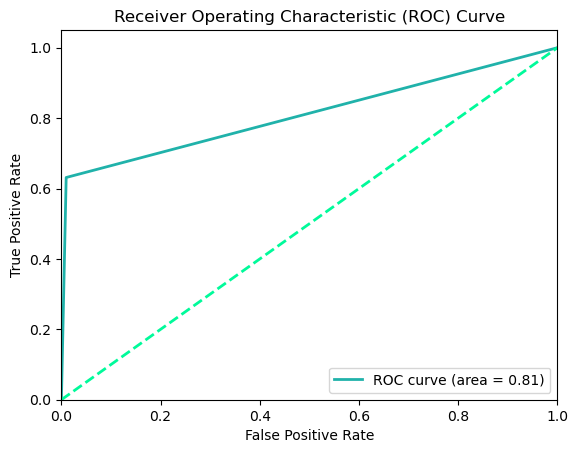

In [45]:
#Make the ROC curve chart
plt.figure()
plt.plot(fpr, tpr, color='lightseagreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='mediumspringgreen', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [38]:
#In the chart we can see that the AUC is 0.81 which means that it is a very good performance

##AUC performance:
### >0.9 - exceptional
### between 0.8 and 0.9 - very good
### between 0.7 and 0.8 good
### between 0.5 and 0.7 reasonable

In [43]:
#Create a confusion matrix for the logistic regression model
cm = confusion_matrix(y_test, y_pred)
cm

#Interpretation of confusion matrix:
#     TN | FP
#     FN | TP


array([[17393,   169],
       [  615,  1053]], dtype=int64)

In [ ]:
#Number of True Negatives: 17393
    ##the model correctly identified 17393 cases as negative and these cases were actually negative in the data

#Number of False Positives: 169
    ##the model incorrectly classified 169 cases as positive, but these cases were actually negative in the data

#Number of True Positives: 1053
    ##the model correctly identified 1053 cases as positive and these cases really were positive in the data

#Number of False Negatives: 615
    ##the model wrongly predicted 615 cases as negative but these cases were actually positive in the data



In [48]:
#Precision, Recall, F1-score and error rate
#Defining the values
true_positives = 1053
false_negatives = 615
false_positives = 169
true_negatives = 17393

#Calculating the metrics - Precision, Recall, F1-score
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * (precision * recall) / (precision + recall)
accuracy = (true_positives + true_negatives) / (true_positives + false_negatives + false_positives + true_negatives)

#Calculating the erro rate
error_rate = 1 - accuracy

#Showing the results:
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Error rate:", error_rate)

Precision: 0.8617021276595744
Recall: 0.6312949640287769
F1-score: 0.7287197231833908
Error rate: 0.04076963078523144


In [ ]:
#Interpretation of the metrics:

##Precision - measures the proportion of true positives - cases correctly identified as positive:
    #This means that around 86% of the model's positive predictions were actually correct
    #When the model predicted something was positive, it was correct about 86% of the time

##Recall - sensitivity or true positive rate -  true positives correctly identified by the model.
    #This indicates that around 63% of all positive cases were correctly identified by the model
    #the model managed to capture almost all the positive cases, missing only about 0.63% of them

##F1-score - is the harmonic mean of precision and recall - A high F1-score indicates a good balance between precision and recall
    ##It provides a balance between precision and recall  
    ##the F1-score is 72%, which indicates a good balance between the model's ability to make accurate predictions and its ability to recover all positive cases

##Error rate - proportion of wrong predictions made by the model
    ##The error rate is approximately 4%, which means that around 4.08% of all the model's predictions are wrong.

In [ ]:
#Conclusion about this metrics:
    ##The model performs well overall, but it needs improvement, especially in its ability to correctly identify positive cases
